In [1]:
import pandas as pd

import plotly.express as px

from tqdm import tqdm

from time import sleep

import seaborn as sns

In [2]:
# берем новый ДФ, но там специфический разделитель - \t' - это символ табуляции !!!
# это не совсем csv файл, а tsv файл, который сохранили в формате csv !!!

# в нем хранятся данные по недвижимисти, которая продается в Санкт-Петербурге и Лен области
# скорее всего, это жилая недвижимость
# в таблице много пропусков

# в файле у нас одна колонка, в которой указана дата + временная зона - это first_day_exposition
# данные не совсем корректные, мы хотим их исправить на более понятные, без временной зоны
# в этом поможет аргумент parse_dates. в который надо передать список с колонками или колонкой !!!
# parse_dates = ['first_day_exposition']
# в итоге у нас нормальная временная метка

In [3]:
estate = pd.read_csv('real_estate_data.csv', sep = '\t', parse_dates = ['first_day_exposition'])
estate

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
# посмотрим информацию по ДФу через Инфо из Пандаса

# 23699 записей

In [5]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [6]:
# сделаем гистограммы, которые встроены в Пандас
# они были маленькие, поэтому мы изменили масштаб - figsize = (20,20)

# по игрику у нас значения, по иксу - кол-во записей
# например, в total_images у нас более 7000 записей в диапазоне 5 - 10 фотографий объекта

# здесь показываются отображаются данные без учета пропусков, коих много

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

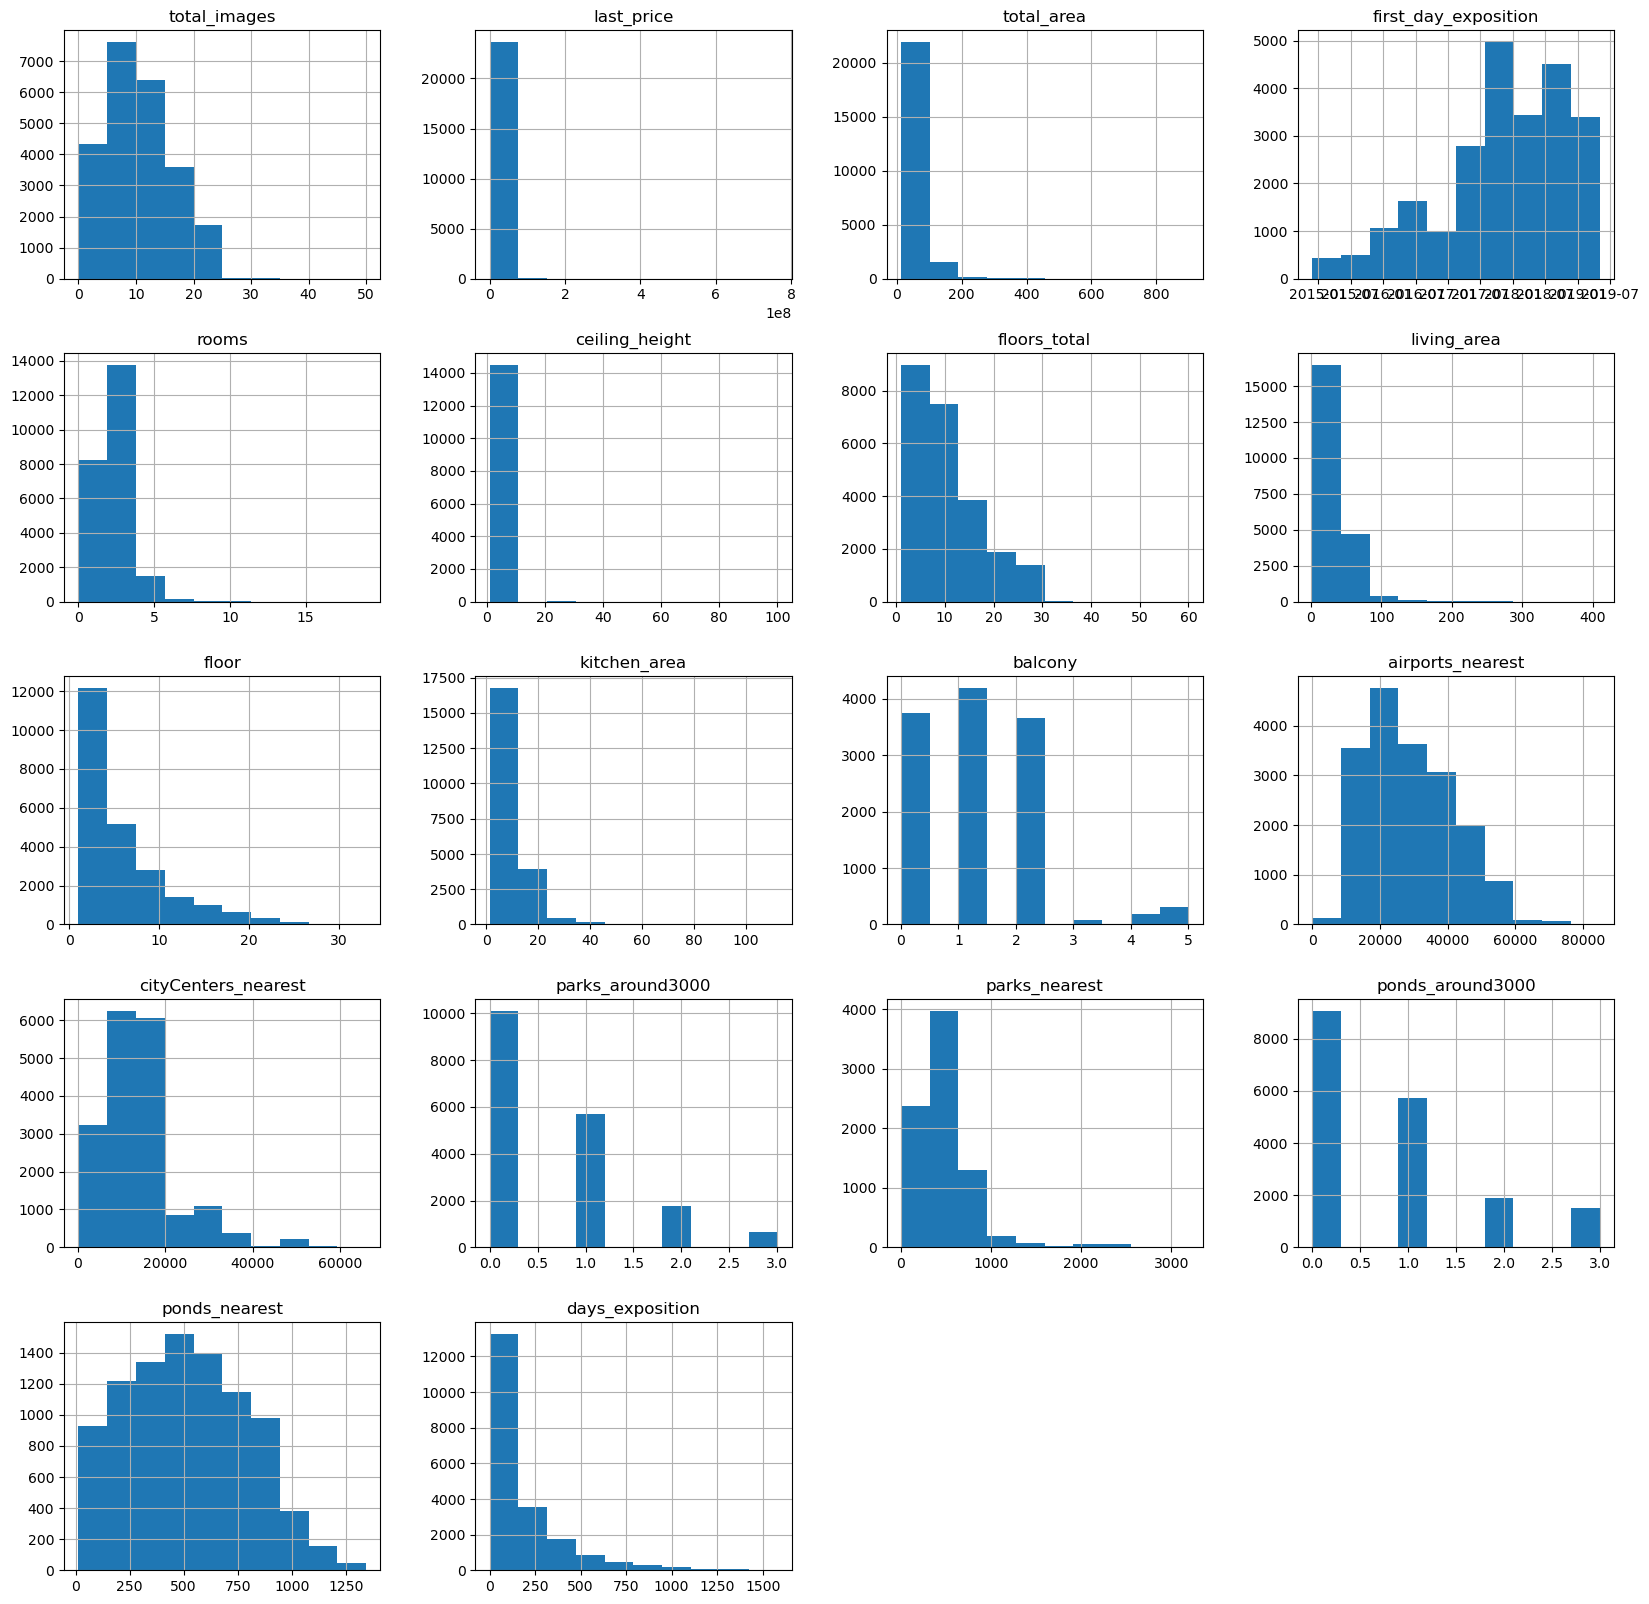

In [7]:
estate.hist(figsize = (20,20))

In [8]:
# давайте посмотрим кол-во записей без данных по каждой колонке

In [9]:
estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# посмотрим локации объектов недвижимости

# выше мы видим, что там 49 пропусков
# это единственная строчная колонка в ДФе !!!

In [11]:
estate['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:
# посмотрим кол-во уникальных записей в названии локации объектов недвижимости

In [13]:
len(estate['locality_name'].unique())

365

In [14]:
# посмотрим на кол-во записей в той же таблице, но с учетом нижнего регистра, так как у нас тут строки
# они равны, можно ничего не менять, каких-либо копий данных нет

In [15]:
len(estate['locality_name'].str.lower().unique())

365

In [16]:
# мои записи, продолжение ниже

In [17]:
# estate['airports_nearest'].isna().sum()

In [18]:
# len(estate['airports_nearest'].unique())

In [19]:
# estate.loc[(estate['locality_name'] == 'городской посёлок Янино-1')]

In [20]:
# estate.groupby('locality_name')['airports_nearest'].agg('min','max')

In [21]:
# estate.groupby('locality_name')['airports_nearest'].value_counts()

In [22]:
# estate.groupby('locality_name')['airports_nearest'].mean()

In [23]:
# estate[estate['locality_name'].isna()]

In [24]:
# estate[estate['airports_nearest'].isna()]

In [25]:
# estate[estate['locality_name']=='городской посёлок Янино-1']

In [26]:
# locality = pd.DataFrame(estate.groupby('locality_name')['airports_nearest'].value_counts())
# locality

In [27]:
# locality.to_excel(r'locality.xlsx')

In [28]:
# estate['floors_total'].isna().sum()

In [29]:
# estate[estate['floors_total'] <= 3]

In [30]:
# estate[estate['floors_total'] > 3]

In [31]:
# estate[estate['floors_total'] == 4]

In [32]:
# estate[estate['floors_total'] == 5]

In [33]:
# estate[estate['floors_total'] == 5]

In [34]:
# estate[estate['floors_total'] > 30]

In [35]:
# estate[estate['floors_total'] == 1]

In [36]:
# мы хотим соотнести каждый лот на тему к принанадлежности к тому или иному зданию
# скорее всего будет продаваться несколько или более квартир в одном доме или несколько помещений в одном здании
# мы хотим их объединить

# если квартиры будут относится к одному дому, то этажей, например, будет одинаковое кол-во - floors_total
# далее будет совпадать locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest,
# ponds_around3000, ponds_nearest, ceiling_height
# но в начале мы использовали немного меньше колонок, что дало больше дубликатов, тем самым таблица сильно похудела
# это нам не понравилось
# в таблице очень много Нанов, много совпадений/дубликатов, скорее всего, из-за них

# первым делом нам надо сделать такой срез и проверить на наличие дубликатов
# когда ДС подразумевает, что все записи уникальные, нам надо всегда юзать duplicated() и его аналоги !!!

# применим метод duplicated и посмотрим кол-во совпадений через sum

In [37]:
type(estate[['floors_total',
        'locality_name',
        'airports_nearest',
        'cityCenters_nearest',
        'parks_around3000',
        'parks_nearest',
        'ponds_around3000',
        'ponds_nearest',
       'ceiling_height']])

pandas.core.frame.DataFrame

In [38]:
estate[['floors_total',
        'locality_name',
        'airports_nearest',
        'cityCenters_nearest',
        'parks_around3000',
        'parks_nearest',
        'ponds_around3000',
        'ponds_nearest',
       'ceiling_height']].duplicated().sum()

6987

In [39]:
# дубликатов очень много, давайте уберем их через метод drop_duplicates()
# когда ДС подразумевает, что все записи уникальные, нам надо всегда юзать drop_duplicates и его аналоги !!!

# у нас получилось более 16000 групп

In [40]:
estate[['floors_total',
        'locality_name',
        'airports_nearest',
        'cityCenters_nearest',
        'parks_around3000',
        'parks_nearest',
        'ponds_around3000',
        'ponds_nearest',
       'ceiling_height']].drop_duplicates()

,floors_total,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,ceiling_height
0,16.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2.70
1,11.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,NaN
2,5.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN
3,14.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,NaN
4,14.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,3.03
...,...,...,...,...,...,...,...,...,...
23688,15.0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,3.05
23690,5.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,NaN
23691,25.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,2.75
23693,9.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,2.60


In [41]:
# сохраним ДФ с дропнутыми дубликатами для дальнейшей работы
# по сути, тут уникальные записи
# Юник для Сериеса, а у нас его тут нет
# у нас Нампай Эррэй 16712 × 9 !!!

In [42]:
droped_estate = estate[['floors_total',
        'locality_name',
        'airports_nearest',
        'cityCenters_nearest',
        'parks_around3000',
        'parks_nearest',
        'ponds_around3000',
        'ponds_nearest',
       'ceiling_height']].drop_duplicates()

droped_estate

,floors_total,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,ceiling_height
0,16.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,2.70
1,11.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,NaN
2,5.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN
3,14.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,NaN
4,14.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,3.03
...,...,...,...,...,...,...,...,...,...
23688,15.0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,3.05
23690,5.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,NaN
23691,25.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,2.75
23693,9.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,2.60


In [43]:
# проитерируем Вэльюс(все значения) этого массива
# возьмем одну итерацию, у нам Эррэй

# пойдем дальше, возьмем этот срез и сделаем срез исходной таблицы по этому принципу
# будем тестировать на одной итерации

In [44]:
for drops in droped_estate.values:
    print(drops, '\n', type(drops))
    break

[16.0 'Санкт-Петербург' 18863.0 16028.0 1.0 482.0 2.0 755.0 2.7] 
 <class 'numpy.ndarray'>


In [45]:
# вызовем свойство columns у droped_estate
# там будут названия колонок, их названия идентичны базовым

In [46]:
droped_estate.columns

Index(['floors_total', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'ceiling_height'],
      dtype='object')

In [47]:
type(droped_estate.columns)

pandas.core.indexes.base.Index

In [48]:
# позже сделаем срез из estate
# для этого нам нужна маска, сохраним ее в переменную mask
# скорее всего цикл будет двухуровневый

# на первом уровне мы будем накапливать эту маску
# возьмем базовый ДФ со срезом по этажам и вытащим записи, которые равны drops[0] или 16

# это исходный цикл, теперь нам нужен второй

In [49]:
for drops in droped_estate.values:
    mask = estate['floors_total'] == drops[0]
    display(estate[mask])
    break

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
19,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,NaN,...,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
31,8,7200000.0,67.9,2017-10-26,2,2.80,16.0,38.1,4,NaN,...,13.4,2.0,Санкт-Петербург,32888.0,12944.0,0.0,NaN,0.0,NaN,112.0
34,3,3290000.0,33.0,2018-02-04,1,2.55,16.0,14.0,3,NaN,...,8.0,NaN,Санкт-Петербург,13943.0,12739.0,0.0,NaN,0.0,NaN,15.0
116,18,10999000.0,97.2,2017-11-13,3,2.50,16.0,NaN,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23,1,2.55,16.0,NaN,15,NaN,...,NaN,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23647,9,5700000.0,45.6,2019-01-09,1,2.75,16.0,18.7,6,NaN,...,17.6,NaN,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,8.0
23650,20,10000000.0,84.2,2018-02-01,3,2.60,16.0,51.7,6,NaN,...,11.9,NaN,Санкт-Петербург,36388.0,13302.0,0.0,NaN,0.0,NaN,NaN
23675,8,3550000.0,39.5,2016-10-03,1,NaN,16.0,19.0,13,NaN,...,8.5,NaN,Санкт-Петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,721.0


In [50]:
# второй цикл пойдет по колонкам, но не с первой, а со второй, так как первая запись была использована в первом цикле
# этажи выпадают, остаются все остальные колонки

# во втором цикле будем обновлять Маску
# берем старую маску и новое булево - mask = mask & (estate[col] == drop)
# Дропа у нас пока нет, для этого усложним второй цикл
# можно сделать через Зип, а можно обернуть droped_estate.columns[1:] в Энумирэйт, что даст номера
# в Дроп у нас пойдут все остальные записи, кроме первой, из первого цикла

# в итоге мы видим срез из базовой таблицы, маска которого учитывает 9 признаков
# в droped_estate у нас не такой порядок колонок, как в базовом ДФе, но они оттуда, это может немного сбивать
# по хорошему, нам надо было сделать аналогичную последовательность, но тогда floors_total стал вторым значением !!!

# в выводе у нас поэтапное уменьшение таблицы, исходя из среза в 9 колонок - цикл на 8 итераций + 1 итерация из цикла
# в итоге всем параметрам соответствуют всего 3 записи, то есть эти квартиры, скорее всего, к одному дому

# эти данные можно использовать для заполнения Нанов, но каких именно?
# например, больше всего Нанов в is_apartment, которые нам не нужны, такой себе ориентир

# если мы уберем Брэйк то получим тысячи разных групп

# можно было бы не делать второй срез, но тогда нам надо было бы прописывать 9 утверждений, а это очень длинная запись

In [51]:
for drops in droped_estate.values:
    mask = estate['floors_total'] == drops[0]
    display(estate[mask])
    for col, drop in zip(droped_estate.columns[1:], drops[1:]):
        mask = mask & (estate[col] == drop)
        display(estate[mask])
    break

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
19,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,NaN,...,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
31,8,7200000.0,67.9,2017-10-26,2,2.80,16.0,38.1,4,NaN,...,13.4,2.0,Санкт-Петербург,32888.0,12944.0,0.0,NaN,0.0,NaN,112.0
34,3,3290000.0,33.0,2018-02-04,1,2.55,16.0,14.0,3,NaN,...,8.0,NaN,Санкт-Петербург,13943.0,12739.0,0.0,NaN,0.0,NaN,15.0
116,18,10999000.0,97.2,2017-11-13,3,2.50,16.0,NaN,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23,1,2.55,16.0,NaN,15,NaN,...,NaN,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23647,9,5700000.0,45.6,2019-01-09,1,2.75,16.0,18.7,6,NaN,...,17.6,NaN,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,8.0
23650,20,10000000.0,84.2,2018-02-01,3,2.60,16.0,51.7,6,NaN,...,11.9,NaN,Санкт-Петербург,36388.0,13302.0,0.0,NaN,0.0,NaN,NaN
23675,8,3550000.0,39.5,2016-10-03,1,NaN,16.0,19.0,13,NaN,...,8.5,NaN,Санкт-Петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,721.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
19,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,NaN,...,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
31,8,7200000.0,67.9,2017-10-26,2,2.80,16.0,38.1,4,NaN,...,13.4,2.0,Санкт-Петербург,32888.0,12944.0,0.0,NaN,0.0,NaN,112.0
34,3,3290000.0,33.0,2018-02-04,1,2.55,16.0,14.0,3,NaN,...,8.0,NaN,Санкт-Петербург,13943.0,12739.0,0.0,NaN,0.0,NaN,15.0
116,18,10999000.0,97.2,2017-11-13,3,2.50,16.0,NaN,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23,1,2.55,16.0,NaN,15,NaN,...,NaN,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23647,9,5700000.0,45.6,2019-01-09,1,2.75,16.0,18.7,6,NaN,...,17.6,NaN,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,8.0
23650,20,10000000.0,84.2,2018-02-01,3,2.60,16.0,51.7,6,NaN,...,11.9,NaN,Санкт-Петербург,36388.0,13302.0,0.0,NaN,0.0,NaN,NaN
23675,8,3550000.0,39.5,2016-10-03,1,NaN,16.0,19.0,13,NaN,...,8.5,NaN,Санкт-Петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,721.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1402,10,9000000.0,110.0,2017-04-29,3,2.7,16.0,53.0,2,NaN,...,20.5,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,223.0
11843,20,16500000.0,109.0,2017-01-19,3,2.8,16.0,72.0,3,NaN,...,20.0,4.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,369.0
15596,2,3500000.0,43.9,2018-10-19,1,2.7,16.0,18.2,1,NaN,...,11.6,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,41.0
16276,20,13200000.0,98.2,2019-01-28,3,2.5,16.0,53.7,9,NaN,...,18.7,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
17230,2,19327000.0,175.7,2017-12-06,5,NaN,16.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,11.0
19180,3,11935000.0,108.5,2017-12-10,3,NaN,16.0,51.9,1,NaN,...,20.7,2.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,90.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1402,10,9000000.0,110.0,2017-04-29,3,2.7,16.0,53.0,2,NaN,...,20.5,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,223.0
11843,20,16500000.0,109.0,2017-01-19,3,2.8,16.0,72.0,3,NaN,...,20.0,4.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,369.0
15596,2,3500000.0,43.9,2018-10-19,1,2.7,16.0,18.2,1,NaN,...,11.6,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,41.0
16276,20,13200000.0,98.2,2019-01-28,3,2.5,16.0,53.7,9,NaN,...,18.7,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
17230,2,19327000.0,175.7,2017-12-06,5,NaN,16.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,11.0
19180,3,11935000.0,108.5,2017-12-10,3,NaN,16.0,51.9,1,NaN,...,20.7,2.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,90.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1402,10,9000000.0,110.0,2017-04-29,3,2.7,16.0,53.0,2,NaN,...,20.5,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,223.0
11843,20,16500000.0,109.0,2017-01-19,3,2.8,16.0,72.0,3,NaN,...,20.0,4.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,369.0
15596,2,3500000.0,43.9,2018-10-19,1,2.7,16.0,18.2,1,NaN,...,11.6,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,41.0
16276,20,13200000.0,98.2,2019-01-28,3,2.5,16.0,53.7,9,NaN,...,18.7,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
17230,2,19327000.0,175.7,2017-12-06,5,NaN,16.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,11.0
19180,3,11935000.0,108.5,2017-12-10,3,NaN,16.0,51.9,1,NaN,...,20.7,2.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,90.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1402,10,9000000.0,110.0,2017-04-29,3,2.7,16.0,53.0,2,NaN,...,20.5,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,223.0
11843,20,16500000.0,109.0,2017-01-19,3,2.8,16.0,72.0,3,NaN,...,20.0,4.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,369.0
15596,2,3500000.0,43.9,2018-10-19,1,2.7,16.0,18.2,1,NaN,...,11.6,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,41.0
16276,20,13200000.0,98.2,2019-01-28,3,2.5,16.0,53.7,9,NaN,...,18.7,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
17230,2,19327000.0,175.7,2017-12-06,5,NaN,16.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,11.0
19180,3,11935000.0,108.5,2017-12-10,3,NaN,16.0,51.9,1,NaN,...,20.7,2.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,90.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1402,10,9000000.0,110.0,2017-04-29,3,2.7,16.0,53.0,2,NaN,...,20.5,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,223.0
11843,20,16500000.0,109.0,2017-01-19,3,2.8,16.0,72.0,3,NaN,...,20.0,4.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,369.0
15596,2,3500000.0,43.9,2018-10-19,1,2.7,16.0,18.2,1,NaN,...,11.6,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,41.0
16276,20,13200000.0,98.2,2019-01-28,3,2.5,16.0,53.7,9,NaN,...,18.7,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
17230,2,19327000.0,175.7,2017-12-06,5,NaN,16.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,11.0
19180,3,11935000.0,108.5,2017-12-10,3,NaN,16.0,51.9,1,NaN,...,20.7,2.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,90.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1402,10,9000000.0,110.0,2017-04-29,3,2.7,16.0,53.0,2,NaN,...,20.5,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,223.0
11843,20,16500000.0,109.0,2017-01-19,3,2.8,16.0,72.0,3,NaN,...,20.0,4.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,369.0
15596,2,3500000.0,43.9,2018-10-19,1,2.7,16.0,18.2,1,NaN,...,11.6,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,41.0
16276,20,13200000.0,98.2,2019-01-28,3,2.5,16.0,53.7,9,NaN,...,18.7,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
17230,2,19327000.0,175.7,2017-12-06,5,NaN,16.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,11.0
19180,3,11935000.0,108.5,2017-12-10,3,NaN,16.0,51.9,1,NaN,...,20.7,2.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,90.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1402,10,9000000.0,110.0,2017-04-29,3,2.7,16.0,53.0,2,NaN,...,20.5,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,223.0
15596,2,3500000.0,43.9,2018-10-19,1,2.7,16.0,18.2,1,NaN,...,11.6,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,41.0


In [52]:
# ниже разберем немного на части наш код и снова поймём, что очень много Нанов, которые всё портят

In [53]:
# посмотрим на наш промежуточный итог через Эррэй, это ломает обзор

In [54]:
estate[mask].values

array([[20, 13000000.0, 108.0, Timestamp('2019-03-07 00:00:00'), 3, 2.7,
        16.0, 51.0, 8, nan, False, False, 25.0, nan, 'Санкт-Петербург',
        18863.0, 16028.0, 1.0, 482.0, 2.0, 755.0, nan],
       [10, 9000000.0, 110.0, Timestamp('2017-04-29 00:00:00'), 3, 2.7,
        16.0, 53.0, 2, nan, False, False, 20.5, 1.0, 'Санкт-Петербург',
        18863.0, 16028.0, 1.0, 482.0, 2.0, 755.0, 223.0],
       [2, 3500000.0, 43.9, Timestamp('2018-10-19 00:00:00'), 1, 2.7,
        16.0, 18.2, 1, nan, False, False, 11.6, nan, 'Санкт-Петербург',
        18863.0, 16028.0, 1.0, 482.0, 2.0, 755.0, 41.0]], dtype=object)

In [55]:
# возьмем функцию из Пандаса set_option
# Устанавливает значение указанной опции, их много, все есть в мануале
# первый аргумент - строка, сама опция; второй - это число

# у нас в ДФе до 22 колонок, соответсвенно второй аргумент должен быть более 22
# таким образом мы сможем видеть все колонки в выводе данных после запуска этой команды

In [56]:
pd.set_option('display.max_columns', 25)

In [57]:
# Пандас показывает мало колонок, если много записей
# это можно исправить опять же через pd.set_option

# добавляем 2 аргумента pd.set_option('display.max_rows', 200)
# просто так это не заработало
# попробовали добавить estate.head(200), всё ок
# но нужно указывать одинаковые значения в set_option и head !!!

# можно сделать тоже самое, но будет отражено определенное кол-во случайных записей
# значения также указываем одинаковые !!!

In [58]:
pd.set_option('display.max_rows', 200)
# estate.head(200)
estate.sample(200)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3962,8,3490000.0,41.00,2016-09-09,1,NaN,17.0,20.50,17,False,False,False,10.60,0.0,Санкт-Петербург,35720.0,16022.0,0.0,NaN,3.0,574.0,270.0
10247,9,3499999.0,73.10,2018-07-08,3,NaN,5.0,NaN,5,NaN,False,False,NaN,NaN,деревня Пеники,NaN,NaN,NaN,NaN,NaN,NaN,45.0
6961,4,3400000.0,38.70,2016-01-11,1,2.70,12.0,20.10,5,False,False,False,10.30,2.0,Санкт-Петербург,15606.0,14402.0,1.0,413.0,0.0,NaN,551.0
19812,18,4090000.0,44.10,2018-03-26,1,3.00,7.0,25.00,3,NaN,False,False,10.10,NaN,Санкт-Петербург,18672.0,14985.0,3.0,156.0,2.0,466.0,43.0
12771,9,14400000.0,109.00,2019-03-14,3,2.50,21.0,44.80,18,NaN,False,False,12.20,2.0,Санкт-Петербург,13275.0,12071.0,0.0,NaN,0.0,NaN,NaN
17219,16,6500000.0,76.00,2017-11-10,3,3.00,5.0,53.00,1,NaN,False,False,9.00,NaN,Санкт-Петербург,31806.0,8884.0,0.0,NaN,1.0,581.0,228.0
21290,5,6920000.0,85.00,2015-07-16,3,NaN,10.0,48.00,7,False,False,False,10.20,2.0,Санкт-Петербург,10584.0,11532.0,0.0,NaN,1.0,801.0,431.0
17689,5,1200000.0,41.00,2015-05-22,2,NaN,5.0,24.00,1,NaN,False,False,6.00,1.0,поселок городского типа Дружная Горка,NaN,NaN,NaN,NaN,NaN,NaN,466.0
7031,5,4100000.0,56.40,2018-03-20,2,NaN,11.0,27.80,1,NaN,False,False,8.90,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18049,15,4550000.0,37.80,2019-01-22,1,2.65,12.0,20.10,11,NaN,False,False,10.10,2.0,Санкт-Петербург,26766.0,10939.0,1.0,524.0,1.0,913.0,9.0


In [59]:
# pd.set_option('display.height', 50)

In [60]:
# пример для дз

# в примере выше пропусков по kitchen_area нет, но они могли быть
# доберемся до момента, где в маске немного данных и пропуски были (они есть в первой итерации точно)

# Брейк переместим в тело Ифа, где будет проверка на наличие пропусков в kitchen_area
# если estate[mask]['kitchen_area'].isna().sum() = 0, то будет Фолс (Наны есть, значит больше нуля)
# можно написать больше 0, но можно и не писать, если больше 0, то всегда Тру
# допом, чтобы срез по маске был больше единицы - len(estate[mask]) > 1
# нас не интересуют пустые срезы и срезы, в которых 1 запись, поэтому len(estate[mask]) > 1
# наша задача взять срез, где будет Нан + какое-то значение, значит длина должна быть равна двум или более

In [61]:
# апдейт по циклу !!!

# всё зависало из-за Дисплэя, так как он вывод все циклы, а это в данной ситуации очень напряжно

# сделаем доп импорт - from tqdm import tqdm или индикатор прогресса выполнения кода
# for drops in tqdm(droped_estate.values)

# наш алгоритм не работает корректно
# дополняем Иф
# пробуем без переприсваивания - estate[mask]['kitchen_area'].fillna(estate[mask]['kitchen_area'].median(), inplace = True)
# по сути, это тоже самое, но опять Наны не заменяются

# попробовали ниже Лок, который сработал, только через него можно было сделать замену нанов
# estate.loc[mask,'kitchen_area']=estate[mask]['kitchen_area'].fillna(estate[mask]['kitchen_area'].median())
# проблема в Филна, он не мог просто так закинуть данные, но Лок помог
# это очень частный случай, понять его до конца мне пока тяжело

# допом мы обратили внимание на первое утверждение в Ифе, оно не совсем корректно
# нам нужно, чтобы estate[mask]['kitchen_area'].isna().sum() была меньше чем len(estate[mask])
# еще введём вторую границу слева, что 0 меньше меньше суммы Нанов, а они меньше длины маски
# пздц

# напоминаю, что мы сформировали срезы на основании разделения объектов недвижимости на группы
# где группа, предположительно, это один дом или здание с похожими объектами недвижимости по 9 фактрорам !!!

# !!!
# внутреннего цикла можно было бы избежать, если бы у нас была команда по типу: 
# (но нужно было бы использовать Айлок, так как он даст метки индексов в виде чисел)
# mask = (estate.iloc[:,0] == drops[0]) & (estate.iloc[:,1] == drops[1]) & (estate.iloc[:,2] == drops[2])... до 8ми

In [62]:
for drops in tqdm(droped_estate.values):
    mask = estate['floors_total'] == drops[0]
    for col,drop in zip(droped_estate.columns[1:], drops[1:]):
        mask = mask & (estate[col] == drop)
#     display(estate[mask])
#     sleep(1)
    if (0 < estate[mask]['kitchen_area'].isna().sum() < len(estate[mask])) & (len(estate[mask]) > 1):
        estate.loc[mask,'kitchen_area']=estate[mask]['kitchen_area'].fillna(estate[mask]['kitchen_area'].median())
#         break

100%|███████████████████████████████████████████████████████████████████████████| 16712/16712 [00:44<00:00, 372.19it/s]


In [63]:
estate[mask]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN


In [64]:
# попробовали сделать замену данных через второй аргумент Филна - inplace = True
# но он банально не слушается и не выполняет команду, что непонятно
# estate[mask]['kitchen_area'].fillna(estate[mask]['kitchen_area'].median(), inplace = True)

# попробуем по-другому, будем использовать Лок, где для рядов будет Маск, для столбцов kitchen_area
# estate.loc[mask,'kitchen_area']=estate[mask]['kitchen_area'].fillna(estate[mask]['kitchen_area'].median())

In [65]:
estate[mask]['kitchen_area']

23694    13.83
Name: kitchen_area, dtype: float64

In [66]:
# проверим теперь кол-во пропусков

# !!!
# к сожалению, их все не устранить, так как получается много срезов, где одни Наны и взять данные для определения Медианы нельзя

# в итоге, по данной схеме мы смогли заменить всего 20 значений, что лол
# всё, что мы делали выше, не дало ощутимых результатов

# менее строгое разделение, которое в ДЗ, должно помочь лучше !!!
# инфо ниже



# коснемся этой проблемы подробнее 
# мы можем сделать одно действие по разному
# например, создать список определенный список через Аппенд, а можно через генераторное выражение
# увеличение чего-то на единицу через = и дальнейшие действия, а можно через +=
# делая это, мы подразумеваем идентичные действия и процессы, но это не так
# например, амперсанд, который мы использовали выше, не является полноценной заменой Энду !!!
# он работает корректно только в части ситуаций

# с помощью Лок и Айлок мы можем создавать буфер для взамодействий с ДФ по принципы КРУД
# некоторые опрации можно совершить и без Лока и Айлока, а другим путем, а через двойную индексацию - estate[mask]['kitchen_area']
# можно было записать так
# estate.loc[mask,'kitchen_area'].fillna(estate[mask]['kitchen_area'].median(),inplace = True)
# estate[mask]['kitchen_area'] даёт возможность не только брать данные, но и менять их
# на первый взгляд одно и тоже, но не совсем, так как Филна работает по разному !!!

In [67]:
estate['kitchen_area'].isna().sum()

2258

In [68]:
# проверяем работу Филна, всё работает

In [69]:
# estate['kitchen_area'].fillna(0).isna().sum()

In [70]:
# изменим в нашем ДФе метры на километры в двух колонках через их деление на 1000
# Символ ‘//’ используется для выполнения целочисленного деления
# В результате такого деления получается целое число, дробная часть отбрасывается

In [71]:
estate[['airports_nearest', 'cityCenters_nearest']] = estate[['airports_nearest', 'cityCenters_nearest']]//1000

In [72]:
# добавим в исходный ДФ 3 колонки с булевыми значениями
# первый этаж, промежуточный этаж и последний этаж

# если этаж = 1, то добавляем инфо о первом этаже
# если этаж = всему кол-ву этажей, то добавляем инфо о том, что это последний этаж
# во всех остальных случаях этаж является промежуточным

# созададим 3 пустых списка, которые станут колонками
# first_floor = []
# internal_floor = []
# last_floor = []

# напишем цикл, который будет перебирать текущий этаж объекта и общее кол-во этажей на объекте через Зип
# после каждой итерации сделаем наполнение списков булевыми, по 3 за итерацию

# добавляем значения через ключ, где словарём выступает базовый ДФ
# estate['first_floor'] = first_floor
# estate['internal_floor'] = internal_floor
# estate['last_floor'] = last_floor

In [73]:
first_floor = []
internal_floor = []
last_floor = []


for floor, total in zip(estate['floor'],estate['floors_total']):
    if floor == 1:
        first_floor.append(True)
        internal_floor.append(False)
        last_floor.append(False)
    elif floor == total:
        first_floor.append(False)
        internal_floor.append(False)
        last_floor.append(True)
    else:
        first_floor.append(False)
        internal_floor.append(True)
        last_floor.append(False)
        
estate['first_floor'] = first_floor
estate['internal_floor'] = internal_floor
estate['last_floor'] = last_floor

estate

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18.0,16.0,1.0,482.0,2.0,755.0,NaN,False,True,False
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12.0,18.0,0.0,NaN,0.0,NaN,81.0,True,False,False
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21.0,13.0,1.0,90.0,2.0,574.0,558.0,False,True,False
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28.0,6.0,2.0,84.0,3.0,234.0,424.0,False,True,False
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31.0,8.0,2.0,112.0,1.0,48.0,121.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24.0,4.0,1.0,796.0,3.0,381.0,NaN,False,True,False
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,True,False
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39.0,10.0,2.0,173.0,3.0,196.0,602.0,False,True,False


In [74]:
# поработаем с временными метками, у нас одна колонка, в которой указана дата + временная зона - это first_day_exposition
# в Пандасе мы много работаем с матричными операциями, которые применяются сразу ко всему массиву

# Пандас - это обертка для Нампая, это значит, что большая часть инструментов из Нампая есть в Пандас !!!

# итак, в estate['first_day_exposition'] у нас временные метки
# перед тем как с ними работать, нам надо получить к ним доступ
# к строкам мы получим доступ, если допишем .str

# при работе с временными метками нам надо добавить .dt, тогда мы получим доступ и получим аналог модуля datetime
# но у нас есть проблема, метка выглядит в базовом ДФе некорректно

# так как мы исправили данные при чтении файла, мы увидели результат команды, в противном случае была бы ошибка !!!
# мы получили доступ - accessors

In [75]:
estate['first_day_exposition'].dt

In [76]:
# использую pd.to_datetime(estate['first_day_exposition']), мы приведем данные в нормальный вид
# чтобы это было в ДФе нам надо сделать переприсваивание, оно ниже

# но можно сделать это и в момент чтения самого файла, то есть в самом начале, инфо будет в начале файла !!!

In [77]:
estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'])

In [78]:
#  мы можем посмотреть библиотеку datetime или посмотреть объект через Дир, чтобы понять, что с ним можно сделать
# у нас 4 способа получить инфо, рассмотрим их ниже

In [79]:
dir(estate['first_day_exposition'].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

In [80]:
# возвращает день недели по названию дня

In [81]:
estate['first_day_exposition'].dt.day_name()

0        Thursday
1         Tuesday
2        Thursday
3          Friday
4         Tuesday
           ...   
23694     Tuesday
23695      Monday
23696      Sunday
23697     Tuesday
23698      Friday
Name: first_day_exposition, Length: 23699, dtype: object

In [82]:
# возвращает день недели в числовом виде, начинается с нуля !!!

In [83]:
estate['first_day_exposition'].dt.day_of_week

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: first_day_exposition, Length: 23699, dtype: int64

In [84]:
# возвращает день недели в числовом виде, начинается с нуля !!!

In [85]:
estate['first_day_exposition'].dt.dayofweek

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: first_day_exposition, Length: 23699, dtype: int64

In [86]:
# возвращает день недели в числовом виде, начинается с нуля !!!

In [87]:
estate['first_day_exposition'].dt.weekday

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: first_day_exposition, Length: 23699, dtype: int64

In [88]:
# добавим 2 колонки в базовый ДФ - день недели в буквенном и числовом виде
# сделал + 1 во второй колонке, так как в базе начинается с нуля

In [89]:
estate['week_day_as_alphabet'] = estate['first_day_exposition'].dt.day_name()
estate['week_day_as_num'] = estate['first_day_exposition'].dt.weekday + 1
estate

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,...,18.0,16.0,1.0,482.0,2.0,755.0,NaN,False,True,False,Thursday,4
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,...,12.0,18.0,0.0,NaN,0.0,NaN,81.0,True,False,False,Tuesday,2
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,...,21.0,13.0,1.0,90.0,2.0,574.0,558.0,False,True,False,Thursday,4
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,...,28.0,6.0,2.0,84.0,3.0,234.0,424.0,False,True,False,Friday,5
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,...,31.0,8.0,2.0,112.0,1.0,48.0,121.0,False,True,False,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,...,24.0,4.0,1.0,796.0,3.0,381.0,NaN,False,True,False,Tuesday,2
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,True,False,Monday,1
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,Sunday,7
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,...,39.0,10.0,2.0,173.0,3.0,196.0,602.0,False,True,False,Tuesday,2


In [90]:
# задание
# после первой итерации у нас нет пропуска данных в колонках, которые составляют сам срез


# взять другой набор колонок, которые будут включать в себя
# locality_name
# airports_nearest
# cityCenters_nearest

# сделать тоже самое - принадлежность к одному зданию

# в идеале нам надо заменить Наны во всех колонках, но во всех не получится (осталось 19)
# среди них будет только часть для редактирования, на каждую нужен Иф + Филна
# это будут следующие колонки:
# - ceiling_height
# - floors_total
# - living_area
# - kitchen_area

# у нас 1116 групп

# допом надо будет сделать колонку с днём недели в числовом и буквенном выражении
# подготовка и результат есть выше

# посмотрим на кол-во пропусков до и после

In [91]:
estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2258
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
first_floor                 0
internal_floor              0
last_floor                  0
week_day_as_alphabet        0
week_day_as_num             0
dtype: int64

In [92]:
# сделаем срез для маски

In [93]:
hw_estate = estate[['locality_name', 'airports_nearest', 'cityCenters_nearest']].drop_duplicates()
hw_estate

,locality_name,airports_nearest,cityCenters_nearest
0,Санкт-Петербург,18.0,16.0
1,посёлок Шушары,12.0,18.0
2,Санкт-Петербург,21.0,13.0
3,Санкт-Петербург,28.0,6.0
4,Санкт-Петербург,31.0,8.0
...,...,...,...
23173,Сестрорецк,58.0,34.0
23354,деревня Тихковицы,NaN,NaN
23399,Санкт-Петербург,17.0,1.0
23411,деревня Борисова Грива,NaN,NaN


In [94]:
# if (0 < estate[mask]['kitchen_area'].isna().sum() < len(estate[mask])) & (len(estate[mask]) > 1)

# изменим Ифы, двойное утверждение является избыточным, поэтому мы его сократили
# if (0 < estate[mask2]['ceiling_height'].isna().sum() < len(estate[mask2])) и т.д.

# левая граница 0, числа могут быть только целые!
# что может быть больше нуля и меньше длины, если длина = 1? ничего

# Лен не может быть меньше 2х, у нас первое утверждение уже слишком строгое
# но это не значит, что код неверный, это просто излишество



# утверждение гласит, что в estate[mask2]['ceiling_height'] есть пропуски, но их меньше чем длина маски

# вариант без переприсваивания не сработал !!!
# Ифы отработали, но толку 0

In [95]:
# for names in hw_estate.values:
#     mask2 = estate['locality_name'] == names[0]
#     for col, name in zip(hw_estate.columns[1:], names[1:]):
#         mask2 = mask2 & (estate[col] == name)
# #     display(estate[mask2])
#     if (0 < estate[mask2]['ceiling_height'].isna().sum() < len(estate[mask2])):
#         estate.loc[mask2,'ceiling_height'].fillna(estate[mask2]['ceiling_height'].median(),inplace = True)
#         print('if1')
#     if (0 < estate[mask2]['floors_total'].isna().sum() < len(estate[mask2])):
#         estate.loc[mask2,'floors_total'].fillna(estate[mask2]['floors_total'].median(),inplace = True)
#         print('if2')
#     if (0 < estate[mask2]['living_area'].isna().sum() < len(estate[mask2])):
#         estate.loc[mask2,'living_area'].fillna(estate[mask2]['living_area'].median(),inplace = True)
#         print('if3')
#     if (0 < estate[mask2]['kitchen_area'].isna().sum() < len(estate[mask2])):
#         estate.loc[mask2,'kitchen_area'].fillna(estate[mask2]['kitchen_area'].median(),inplace = True)
#         print('if4')

In [96]:
for names in hw_estate.values:
    mask2 = estate['locality_name'] == names[0]
    for col, name in zip(hw_estate.columns[1:], names[1:]):
        mask2 = mask2 & (estate[col] == name)
#         display(estate[mask2])
    if (0 < estate[mask2]['ceiling_height'].isna().sum() < len(estate[mask2])):
        estate.loc[mask2,'ceiling_height']=estate[mask2]['ceiling_height'].fillna(estate[mask2]['ceiling_height'].median())
        
    if (0 < estate[mask2]['floors_total'].isna().sum() < len(estate[mask2])):
        estate.loc[mask2,'floors_total']=estate[mask2]['floors_total'].fillna(estate[mask2]['floors_total'].median())
        
    if (0 < estate[mask2]['living_area'].isna().sum() < len(estate[mask2])):
        estate.loc[mask2,'living_area']=estate[mask2]['living_area'].fillna(estate[mask2]['living_area'].median())  
        
    if (0 < estate[mask2]['kitchen_area'].isna().sum() < len(estate[mask2])):
        estate.loc[mask2,'kitchen_area']=estate[mask2]['kitchen_area'].fillna(estate[mask2]['kitchen_area'].median())

In [97]:
estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           2696
floors_total               14
living_area               643
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              737
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
first_floor                 0
internal_floor              0
last_floor                  0
week_day_as_alphabet        0
week_day_as_num             0
dtype: int64

In [98]:
# ДЗ

# какая наибольшая общая площадь у квартир? total_area +
# какая наибольшая жилая площадь у квартир? living_area +
# какая наибольшая  площадь у кухонь? kitchen_area +

# сколько квартир с наибольшими параметрами total_area, living_area, kitchen_area, last_price, rooms, ceiling_height +

# это всё про одну квартиру!!!


# этажи - если у нас будут примерно одинаковые данные по нескольким этажам, то указать 3х лидеров, например

# можно поработать с Мост Попьюлар, но применить не к числовой характеристике (номер этажа),а к Кат и Кьюкат
# через Кат и Кьюкат сделать разбивку на группы этажей, диапазоны
# это что-то типа группировки, мы из числового признака делаем категориальный

# тоже самое сделать с:
# airports_nearest
# cityCenters_nearest
# parks_nearest

# поработать с частотой выкладывания объявлений, когда и сколько
# у нас для этого теперь есть дни недели, то есть делаем по дням недели


# сделать линейные графики для корреляций
# это метод Корр
# беру срез, где числовые характеристики
# лучше брать срезы по 2 колонки, например, беру срез по высоте потолка и цене, далее применяю метод Корр
# получится одно число

In [99]:
estate['total_area'].max()

900.0

In [100]:
estate[estate['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,False,False,...,30.0,7.0,0.0,NaN,2.0,318.0,106.0,False,False,True,Wednesday,3


In [101]:
estate[estate['total_area'] == estate['total_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,False,False,...,30.0,7.0,0.0,NaN,2.0,318.0,106.0,False,False,True,Wednesday,3


In [102]:
estate['living_area'].max()

409.7

In [103]:
estate[estate['living_area'] == estate['living_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,False,False,...,30.0,7.0,0.0,NaN,2.0,318.0,106.0,False,False,True,Wednesday,3


In [104]:
estate['kitchen_area'].max()

112.0

In [105]:
estate[estate['kitchen_area'] == estate['kitchen_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,False,False,...,30.0,7.0,0.0,NaN,2.0,318.0,106.0,False,False,True,Wednesday,3


In [106]:
estate[(estate['total_area'] == estate['total_area'].max()) 
       & (estate['living_area'] == estate['living_area'].max()) 
       & (estate['kitchen_area'] == estate['kitchen_area'].max())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,False,False,...,30.0,7.0,0.0,NaN,2.0,318.0,106.0,False,False,True,Wednesday,3


In [107]:
estate[estate['ceiling_height'] == estate['ceiling_height'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,False,False,...,34.0,8.0,1.0,223.0,3.0,30.0,19.0,False,False,True,Wednesday,3


In [108]:
# слишком много параметров на вход, однозначного ответа нет, поэтому мы ничего не увидели

In [109]:
estate[(estate['total_area'] == estate['total_area'].max())
       & (estate['living_area'] == estate['living_area'].max())
       & (estate['kitchen_area'] == estate['kitchen_area'].max())
       & (estate['last_price'] == estate['last_price'].max())
       & (estate['rooms'] == estate['rooms'].max())
       & (estate['ceiling_height'] == estate['ceiling_height'].max())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num


In [110]:
# сделаем эксперимент
# почти по всем параметрам лидировал один объект недвижимости

# что будет, если отбросить эти 2 квартиры, может у нас появится какая-то группа объектов?

# представим, что у нас нет индексов этих объектов и нам надо их вычислить
# возьмем 2 ДСа, в которых по одной записи, и применим свойство индекс
# получим массив из 2х объектов, а из него через нулевой индекс возьмем необходимые данные

# проведем эти операции и сохраним в переменные

In [111]:
estate[estate['total_area'] == estate['total_area'].max()].index

Int64Index([19540], dtype='int64')

In [112]:
i1 = estate[estate['total_area'] == estate['total_area'].max()].index[0]
i1

19540

In [113]:
estate[estate['ceiling_height'] == estate['ceiling_height'].max()].index

Int64Index([22869], dtype='int64')

In [114]:
i2 = estate[estate['ceiling_height'] == estate['ceiling_height'].max()].index[0]
i2

22869

In [115]:
# используем переменные, чтобы убрать записи
# в этом поможет метод drop, ему в виде массива (кортеж, список, множество, сериес...), надо передать необходимые данные
# убрать можно было через Айлок и булеву маску, но я выбрал Дроп

# если мы просто передаем массив, то он расценивается как массив с метками рядов !!!
# если хотим удалить столбцы, то надо указать columns = ... !!!

In [116]:
estate.drop([i1,i2])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,...,18.0,16.0,1.0,482.0,2.0,755.0,NaN,False,True,False,Thursday,4
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,...,12.0,18.0,0.0,NaN,0.0,NaN,81.0,True,False,False,Tuesday,2
2,10,5196000.0,56.00,2015-08-20,2,2.57,5.0,34.3,4,NaN,False,False,...,21.0,13.0,1.0,90.0,2.0,574.0,558.0,False,True,False,Thursday,4
3,0,64900000.0,159.00,2015-07-24,3,2.95,14.0,37.7,9,NaN,False,False,...,28.0,6.0,2.0,84.0,3.0,234.0,424.0,False,True,False,Friday,5
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,...,31.0,8.0,2.0,112.0,1.0,48.0,121.0,False,True,False,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,...,24.0,4.0,1.0,796.0,3.0,381.0,NaN,False,True,False,Tuesday,2
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,True,False,Monday,1
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,Sunday,7
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,36.0,12,NaN,False,False,...,39.0,10.0,2.0,173.0,3.0,196.0,602.0,False,True,False,Tuesday,2


In [117]:
# после этого действия нам надо выравнить индексы !!!
# сделаем это через метод reset_index()

In [118]:
estate.drop([i1,i2]).reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
0,0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,...,18.0,16.0,1.0,482.0,2.0,755.0,NaN,False,True,False,Thursday,4
1,1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,...,12.0,18.0,0.0,NaN,0.0,NaN,81.0,True,False,False,Tuesday,2
2,2,10,5196000.0,56.00,2015-08-20,2,2.57,5.0,34.3,4,NaN,False,...,21.0,13.0,1.0,90.0,2.0,574.0,558.0,False,True,False,Thursday,4
3,3,0,64900000.0,159.00,2015-07-24,3,2.95,14.0,37.7,9,NaN,False,...,28.0,6.0,2.0,84.0,3.0,234.0,424.0,False,True,False,Friday,5
4,4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,...,31.0,8.0,2.0,112.0,1.0,48.0,121.0,False,True,False,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,...,24.0,4.0,1.0,796.0,3.0,381.0,NaN,False,True,False,Tuesday,2
23693,23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,True,False,Monday,1
23694,23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,Sunday,7
23695,23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,36.0,12,NaN,False,...,39.0,10.0,2.0,173.0,3.0,196.0,602.0,False,True,False,Tuesday,2


In [119]:
# при использовании этого метода вылезает проблема - индексы, которые мы дропнули, стали отдельной колонкой !!!
# исправим это через аргумент - drop = True

In [120]:
estate.drop([i1,i2]).reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,...,18.0,16.0,1.0,482.0,2.0,755.0,NaN,False,True,False,Thursday,4
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,...,12.0,18.0,0.0,NaN,0.0,NaN,81.0,True,False,False,Tuesday,2
2,10,5196000.0,56.00,2015-08-20,2,2.57,5.0,34.3,4,NaN,False,False,...,21.0,13.0,1.0,90.0,2.0,574.0,558.0,False,True,False,Thursday,4
3,0,64900000.0,159.00,2015-07-24,3,2.95,14.0,37.7,9,NaN,False,False,...,28.0,6.0,2.0,84.0,3.0,234.0,424.0,False,True,False,Friday,5
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,...,31.0,8.0,2.0,112.0,1.0,48.0,121.0,False,True,False,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,...,24.0,4.0,1.0,796.0,3.0,381.0,NaN,False,True,False,Tuesday,2
23693,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,True,False,Monday,1
23694,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,Sunday,7
23695,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,36.0,12,NaN,False,False,...,39.0,10.0,2.0,173.0,3.0,196.0,602.0,False,True,False,Tuesday,2


In [121]:
# расширим текущую задачу, возьмем 6 колонок и сделаем всё немного профессиональнее
# будем искать максимальное значение в 6 колонках, чтобы удалить их

# для этого напишем цикл, который будет проходить по названиям колонок и соберет все метки индексов с результатами
# по легенде у нас есть только названия колонок, мы до этого их не смотрели

# в теле размещаем любую маску из прошлых, которая искала максимальное значение
# estate[estate['total_area'] == estate['total_area'].max()]
# вместо колонки подставляем нашу переменную col, которая проходит по названиям колонок, они идентичны колонкам ДСа
# но наша задача получить индекс, поэтому добавим index[0], как в примере ранее
# for col in ('total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height'):
#     estate[estate[col] == estate[col].max()].index[0]

# теперь нам надо индексы куда-то поместить
# сделаем через множество, для этого создадим его до цикла - info = set()

# пополнять будем через метод add --> info.add()

# если будет проблема с множеством, мы всегда можем сделать через список !!!

In [122]:
info = set()

for col in ('total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height'):
    info.add(estate[estate[col] == estate[col].max()].index[0])
info

{12971, 14498, 19540, 22869}

In [123]:
# сделаем удаление через метод Дроп, как было сделано выше, но через переменную Инфо, где храняться метки индексов
# пересохраним в другой ДФ

In [124]:
cuted_estate = estate.drop(info).reset_index(drop = True)
cuted_estate

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,...,18.0,16.0,1.0,482.0,2.0,755.0,NaN,False,True,False,Thursday,4
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,...,12.0,18.0,0.0,NaN,0.0,NaN,81.0,True,False,False,Tuesday,2
2,10,5196000.0,56.00,2015-08-20,2,2.57,5.0,34.3,4,NaN,False,False,...,21.0,13.0,1.0,90.0,2.0,574.0,558.0,False,True,False,Thursday,4
3,0,64900000.0,159.00,2015-07-24,3,2.95,14.0,37.7,9,NaN,False,False,...,28.0,6.0,2.0,84.0,3.0,234.0,424.0,False,True,False,Friday,5
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,...,31.0,8.0,2.0,112.0,1.0,48.0,121.0,False,True,False,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,...,24.0,4.0,1.0,796.0,3.0,381.0,NaN,False,True,False,Tuesday,2
23691,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False,True,False,Monday,1
23692,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,Sunday,7
23693,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,36.0,12,NaN,False,False,...,39.0,10.0,2.0,173.0,3.0,196.0,602.0,False,True,False,Tuesday,2


In [125]:
# посмотрим теперь на результат в колонках, вдруг будут группы объектов недвижимости
# нет, всё как и ранее, чаще всего это одна квартира

In [126]:
cuted_estate[cuted_estate['total_area'] == cuted_estate['total_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
12859,20,140000000.0,631.2,2019-04-09,7,3.9,4.0,322.3,4,NaN,False,False,...,25.0,4.0,0.0,NaN,2.0,210.0,NaN,False,False,True,Tuesday,2


In [127]:
cuted_estate[cuted_estate['living_area'] == cuted_estate['living_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
5358,20,65000000.0,590.0,2019-02-14,15,3.5,6.0,409.0,3,NaN,False,False,...,24.0,4.0,1.0,767.0,0.0,NaN,14.0,False,True,False,Thursday,4


In [128]:
cuted_estate[cuted_estate['kitchen_area'] == cuted_estate['kitchen_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
20212,2,85000000.0,249.7,2018-02-01,3,3.0,10.0,72.0,9,NaN,False,False,...,31.0,4.0,1.0,2218.0,2.0,99.0,26.0,False,True,False,Thursday,4


In [129]:
cuted_estate[cuted_estate['last_price'] == cuted_estate['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
14704,15,401300000.0,401.0,2016-02-20,5,3.3,9.0,204.0,9,False,False,False,...,21.0,2.0,1.0,545.0,1.0,478.0,393.0,False,False,True,Saturday,6


In [130]:
cuted_estate[cuted_estate['rooms'] == cuted_estate['rooms'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
18846,6,28500000.0,270.0,2015-03-02,16,3.0,4.0,180.0,4,NaN,False,False,...,23.0,4.0,1.0,516.0,0.0,NaN,1365.0,False,False,True,Monday,1


In [131]:
cuted_estate[cuted_estate['ceiling_height'] == cuted_estate['ceiling_height'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,Monday,1
22333,19,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,False,False,...,18.0,3.0,0.0,NaN,3.0,511.0,NaN,False,True,False,Friday,5


In [132]:
# давайте посмотрим на распределение по комнатам и высоте потолков, так как в этих значениях могут быть группы
# лучше это всё разбить Катом или Кьюкатом на сегменты

In [133]:
cuted_estate['rooms'].value_counts()

1     8046
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       58
8       12
9        8
10       3
11       2
14       2
15       1
16       1
Name: rooms, dtype: int64

In [134]:
cuted_estate['ceiling_height'].value_counts()

2.50    4143
2.70    2615
2.60    2453
3.00    1500
2.55    1462
        ... 
4.80       1
4.65       1
5.60       1
3.82       1
3.59       1
Name: ceiling_height, Length: 226, dtype: int64

In [135]:
# посмотрим на комнаты через призму Кат и Кьюкат

# мы увидели аномалию в виде -0.001
# категории состоят из интервалов, в интервале круглая скобка - это не включительно, а квадратная - включительно !!!
# то есть, первый интервал от 0 до 1го, не включая 1

# если мы посмотрим на cuted_estate['rooms'].value_counts() выше, то увидим 197 нулевых значений !!!
# чтобы этот ноль включить, нужно сделать запас, хотя бы, в 0.001, что здесь и продемонстрировано !!!

In [136]:
pd.qcut(cuted_estate['rooms'], 4)

0           (2.0, 3.0]
1        (-0.001, 1.0]
2           (1.0, 2.0]
3           (2.0, 3.0]
4           (1.0, 2.0]
             ...      
23690       (2.0, 3.0]
23691       (2.0, 3.0]
23692       (1.0, 2.0]
23693       (1.0, 2.0]
23694    (-0.001, 1.0]
Name: rooms, Length: 23695, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 16.0]]

In [137]:
# Кату нужно передать определенные значения границ через список или кортеж !!!

# так как есть нули, сделаем первый интервал с запасом

In [138]:
pd.cut(cuted_estate['rooms'],[-0.001,4,8,12,16])

0        (-0.001, 4.0]
1        (-0.001, 4.0]
2        (-0.001, 4.0]
3        (-0.001, 4.0]
4        (-0.001, 4.0]
             ...      
23690    (-0.001, 4.0]
23691    (-0.001, 4.0]
23692    (-0.001, 4.0]
23693    (-0.001, 4.0]
23694    (-0.001, 4.0]
Name: rooms, Length: 23695, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 4.0] < (4.0, 8.0] < (8.0, 12.0] < (12.0, 16.0]]

In [139]:
estate['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.40      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area, Length: 2182, dtype: int64

In [140]:
estate['ceiling_height'].value_counts().max()

4143

In [141]:
estate['ceiling_height'].max()

100.0

In [142]:
estate[estate['ceiling_height']==100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,False,False,...,34.0,8.0,1.0,223.0,3.0,30.0,19.0,False,False,True,Wednesday,3


In [143]:
# топ 10 по самому большому значению

In [144]:
estate['ceiling_height'].value_counts().nlargest(10)

2.50    4143
2.70    2615
2.60    2453
3.00    1501
2.55    1462
2.75    1256
2.65    1232
2.80    1230
3.10     454
3.20     337
Name: ceiling_height, dtype: int64

In [145]:
# топ 10 по самому малому значению

In [146]:
estate['ceiling_height'].value_counts().nsmallest(20)

24.000    1
14.000    1
4.140     1
2.975     1
3.880     1
1.750     1
4.250     1
3.290     1
20.000    1
2.250     1
3.760     1
3.690     1
8.300     1
2.990     1
22.600    1
2.890     1
3.580     1
5.800     1
27.500    1
2.490     1
Name: ceiling_height, dtype: int64

In [147]:
# Мода или самое популярное значение !!!

In [148]:
estate['ceiling_height'].mode()

0    2.5
Name: ceiling_height, dtype: float64

In [149]:
# в Кьюкат число квантилей можно передать обычным числом или через именованный аргумент

In [150]:
pd.qcut(estate['ceiling_height'], q = 4)

0          (2.65, 2.8]
1         (2.55, 2.65]
2         (2.55, 2.65]
3         (2.8, 100.0]
4         (2.8, 100.0]
             ...      
23694     (2.8, 100.0]
23695              NaN
23696              NaN
23697     (2.8, 100.0]
23698    (0.999, 2.55]
Name: ceiling_height, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(0.999, 2.55] < (2.55, 2.65] < (2.65, 2.8] < (2.8, 100.0]]

In [151]:
# добавим новую колонку с помощью Кьюката

In [152]:
estate['ceiling_height_in_quantile'] = pd.qcut(estate['ceiling_height'], q = 4)
estate

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_alphabet,week_day_as_num,ceiling_height_in_quantile
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,...,16.0,1.0,482.0,2.0,755.0,NaN,False,True,False,Thursday,4,"(2.65, 2.8]"
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,...,18.0,0.0,NaN,0.0,NaN,81.0,True,False,False,Tuesday,2,"(2.55, 2.65]"
2,10,5196000.0,56.00,2015-08-20,2,2.57,5.0,34.3,4,NaN,False,False,...,13.0,1.0,90.0,2.0,574.0,558.0,False,True,False,Thursday,4,"(2.55, 2.65]"
3,0,64900000.0,159.00,2015-07-24,3,2.95,14.0,37.7,9,NaN,False,False,...,6.0,2.0,84.0,3.0,234.0,424.0,False,True,False,Friday,5,"(2.8, 100.0]"
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,...,8.0,2.0,112.0,1.0,48.0,121.0,False,True,False,Tuesday,2,"(2.8, 100.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,...,4.0,1.0,796.0,3.0,381.0,NaN,False,True,False,Tuesday,2,"(2.8, 100.0]"
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,45.0,False,True,False,Monday,1,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,Sunday,7,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,36.0,12,NaN,False,False,...,10.0,2.0,173.0,3.0,196.0,602.0,False,True,False,Tuesday,2,"(2.8, 100.0]"


In [153]:
# распределение по квантилям

In [154]:
estate['ceiling_height_in_quantile'].value_counts()

(0.999, 2.55]    6261
(2.65, 2.8]      5949
(2.55, 2.65]     4488
(2.8, 100.0]     4305
Name: ceiling_height_in_quantile, dtype: int64

In [155]:
pd.cut(estate['ceiling_height'], 4)

0        (0.901, 25.75]
1        (0.901, 25.75]
2        (0.901, 25.75]
3        (0.901, 25.75]
4        (0.901, 25.75]
              ...      
23694    (0.901, 25.75]
23695               NaN
23696               NaN
23697    (0.901, 25.75]
23698    (0.901, 25.75]
Name: ceiling_height, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(0.901, 25.75] < (25.75, 50.5] < (50.5, 75.25] < (75.25, 100.0]]

In [156]:
# группировка по новой колонке с квантилями

In [157]:
estate.groupby('ceiling_height_in_quantile').mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\2278565421.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby('ceiling_height_in_quantile').mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
ceiling_height_in_quantile,,,,,,,,,,,,,,,,,,,,,,,
"(0.999, 2.55]",9.768727,4.253188e+06,49.270407,2.013416,2.512067,8.474365,29.854894,4.767769,0.001597,0.000958,7.786846,1.131278,29.794913,16.737990,0.537830,468.334448,0.550841,553.849927,163.505578,0.152052,0.690784,0.157163,3.549593
"(2.55, 2.65]",10.113636,4.904809e+06,53.416448,1.923351,2.612396,12.147314,30.143121,6.625223,0.004234,0.002005,9.662736,1.173583,28.480072,15.681491,0.394859,494.169408,0.579949,576.735401,166.442520,0.116087,0.765374,0.118538,3.614082
"(2.65, 2.8]",9.982014,6.644446e+06,60.161595,1.880652,2.733922,14.758279,31.742489,7.867036,0.011430,0.003530,11.980869,1.330003,28.579898,14.032125,0.504603,569.201601,0.782958,502.953909,183.399658,0.075307,0.830392,0.094302,3.563792
"(2.8, 100.0]",10.277120,1.354719e+07,90.825447,2.754007,3.282930,7.311963,52.315160,4.306852,0.003717,0.001626,14.025168,0.969730,25.756830,7.383727,1.045957,451.406730,1.204719,470.306115,239.745574,0.127991,0.685017,0.186992,3.505691


In [158]:
# группировка с Катом, но без создания новой колонки

In [159]:
estate.groupby(pd.cut(estate['ceiling_height'], 4)).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\311414608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(pd.cut(estate['ceiling_height'], 4)).mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
ceiling_height,,,,,,,,,,,,,,,,,,,,,,,
"(0.901, 25.75]",10.006860,6.975581e+06,61.761578,2.10848,2.735403,10.800991,35.082130,5.947928,0.005384,0.002001,10.662715,1.174846,28.258762,13.639874,0.612253,491.615174,0.769678,518.552300,184.672038,0.11777,0.745069,0.137161,3.558599
"(25.75, 50.5]",11.166667,4.833250e+06,59.950000,2.00000,27.791667,10.916667,37.633333,6.250000,0.000000,0.083333,9.927273,2.300000,27.500000,10.000000,0.166667,305.000000,1.500000,346.666667,170.444444,0.00000,0.833333,0.166667,3.250000
"(50.5, 75.25]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(75.25, 100.0]",0.000000,1.500000e+07,25.000000,1.00000,100.000000,5.000000,14.000000,5.000000,0.000000,0.000000,11.000000,5.000000,34.000000,8.000000,1.000000,223.000000,3.000000,30.000000,19.000000,0.00000,0.000000,1.000000,3.000000


In [160]:
# airports_nearest
# cityCenters_nearest
# parks_nearest

In [161]:
pd.qcut(estate['airports_nearest'],q=4)

0        (-0.001, 18.0]
1        (-0.001, 18.0]
2          (18.0, 26.0]
3          (26.0, 37.0]
4          (26.0, 37.0]
              ...      
23694      (18.0, 26.0]
23695               NaN
23696               NaN
23697      (37.0, 84.0]
23698               NaN
Name: airports_nearest, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 18.0] < (18.0, 26.0] < (26.0, 37.0] < (37.0, 84.0]]

In [162]:
pd.cut(estate['airports_nearest'],4)

0        (-0.084, 21.0]
1        (-0.084, 21.0]
2        (-0.084, 21.0]
3          (21.0, 42.0]
4          (21.0, 42.0]
              ...      
23694      (21.0, 42.0]
23695               NaN
23696               NaN
23697      (21.0, 42.0]
23698               NaN
Name: airports_nearest, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(-0.084, 21.0] < (21.0, 42.0] < (42.0, 63.0] < (63.0, 84.0]]

In [163]:
estate.groupby(pd.qcut(estate['airports_nearest'],q=4)).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\878987847.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(pd.qcut(estate['airports_nearest'],q=4)).mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
airports_nearest,,,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 18.0]",9.897921,5.863940e+06,55.680663,1.995267,2.695764,11.708170,31.653432,6.342046,0.007203,0.002881,9.748080,1.140449,13.868903,14.345410,0.458325,545.654408,0.619675,555.246661,165.845021,0.116279,0.766619,0.117102,3.603005
"(18.0, 26.0]",10.009822,1.039458e+07,77.847693,2.567154,2.921460,8.157185,46.099899,4.662860,0.005482,0.002056,12.123859,0.837209,22.568296,10.766788,0.826862,467.993040,1.015532,465.185443,223.020778,0.126542,0.703289,0.170169,3.503198
"(26.0, 37.0]",10.361797,8.194305e+06,63.495824,2.054089,2.764610,12.540247,34.531799,6.808986,0.003620,0.001704,11.475503,1.257895,32.258305,11.745102,0.604983,489.392451,0.943143,529.233957,176.493976,0.086882,0.809625,0.103492,3.564523
"(37.0, 84.0]",9.849195,5.859999e+06,56.747074,1.955019,2.666538,12.217247,31.442193,6.672112,0.003788,0.001420,10.216383,1.229825,46.352273,18.169981,0.567472,464.190421,0.496449,540.599283,167.802618,0.111269,0.763968,0.124763,3.579545


In [164]:
estate.groupby(pd.cut(estate['airports_nearest'],4)).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\1789767920.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(pd.cut(estate['airports_nearest'],4)).mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
airports_nearest,,,,,,,,,,,,,,,,,,,,,,,
"(-0.084, 21.0]",9.881546,6.487177e+06,59.188455,2.089464,2.738131,10.959314,34.016014,5.989246,0.007325,0.002961,10.119427,1.077876,15.363622,13.609197,0.556733,512.465239,0.804707,497.821245,176.306199,0.121571,0.747662,0.130767,3.573566
"(21.0, 42.0]",10.200337,8.990571e+06,68.798152,2.237416,2.817423,10.886742,38.793566,5.997528,0.003933,0.001573,11.729655,1.128507,30.833708,11.528652,0.704382,491.132633,0.844831,525.919503,194.124659,0.101910,0.767865,0.130225,3.556517
"(42.0, 63.0]",9.932622,5.533116e+06,55.440534,1.943299,2.625147,12.918172,30.620163,7.054492,0.003682,0.001473,9.993901,1.262838,48.558542,19.342047,0.378498,442.435680,0.403535,579.726942,160.140307,0.102356,0.785346,0.112297,3.555965
"(63.0, 84.0]",8.152000,4.541497e+06,52.899200,1.928000,2.854553,6.472000,30.874597,3.384000,0.000000,0.000000,8.086290,1.000000,68.736000,50.328000,1.728000,306.873786,1.640000,367.838095,186.405405,0.256000,0.552000,0.192000,3.712000


In [165]:
pd.qcut(estate['cityCenters_nearest'],q=4)

0         (13.0, 16.0]
1         (16.0, 65.0]
2          (9.0, 13.0]
3        (-0.001, 9.0]
4        (-0.001, 9.0]
             ...      
23694    (-0.001, 9.0]
23695              NaN
23696              NaN
23697      (9.0, 13.0]
23698              NaN
Name: cityCenters_nearest, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 9.0] < (9.0, 13.0] < (13.0, 16.0] < (16.0, 65.0]]

In [166]:
pd.cut(estate['cityCenters_nearest'],4)

0        (-0.065, 16.25]
1          (16.25, 32.5]
2        (-0.065, 16.25]
3        (-0.065, 16.25]
4        (-0.065, 16.25]
              ...       
23694    (-0.065, 16.25]
23695                NaN
23696                NaN
23697    (-0.065, 16.25]
23698                NaN
Name: cityCenters_nearest, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(-0.065, 16.25] < (16.25, 32.5] < (32.5, 48.75] < (48.75, 65.0]]

In [167]:
estate.groupby(pd.qcut(estate['cityCenters_nearest'],q=4)).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\2685612375.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(pd.qcut(estate['cityCenters_nearest'],q=4)).mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
cityCenters_nearest,,,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 9.0]",9.998234,1.274840e+07,84.317887,2.626839,3.022172,8.232882,48.551458,4.725721,0.004316,0.001766,13.277014,0.888383,25.706391,5.350991,0.947028,489.200803,1.157740,473.462879,228.083024,0.104179,0.729841,0.165980,3.523838
"(9.0, 13.0]",10.428245,6.057761e+06,55.586038,1.992567,2.667506,12.636364,31.517179,6.832285,0.004383,0.003049,9.853822,1.227053,26.375095,11.649514,0.579379,508.548947,0.483514,588.182536,165.508825,0.101391,0.799314,0.099295,3.588336
"(13.0, 16.0]",10.288828,5.625094e+06,54.900293,1.924850,2.647923,13.168086,30.603367,6.975952,0.007515,0.001002,10.052122,1.241773,30.914579,14.898547,0.424349,492.008876,0.616483,559.055715,150.620788,0.098196,0.805361,0.096443,3.597946
"(16.0, 65.0]",9.288241,4.801727e+06,54.978796,1.916493,2.659699,11.078646,30.465261,6.180541,0.004422,0.002081,9.967959,1.132536,31.544887,26.300468,0.404266,454.250936,0.807752,485.376179,181.362996,0.141519,0.707856,0.150624,3.548907


In [168]:
estate.groupby(pd.cut(estate['cityCenters_nearest'],4)).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\3437834196.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(pd.cut(estate['cityCenters_nearest'],4)).mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
cityCenters_nearest,,,,,,,,,,,,,,,,,,,,,,,
"(-0.065, 16.25]",10.236537,8.316059e+06,65.610364,2.199219,2.787925,11.218820,37.316331,6.123326,0.005232,0.002023,11.125680,1.129378,27.403619,10.314872,0.666922,496.424536,0.760254,527.240733,182.979294,0.101493,0.776297,0.122210,3.568080
"(16.25, 32.5]",9.288571,4.792602e+06,54.569717,1.892063,2.653230,11.952971,30.083872,6.634286,0.005397,0.002222,10.085382,1.132021,27.978088,23.084762,0.347937,462.164122,0.726984,497.470064,177.344877,0.133968,0.724127,0.141905,3.531429
"(32.5, 48.75]",9.925847,5.176817e+06,58.895297,2.021186,2.660822,7.847134,32.521603,4.542373,0.000000,0.002119,10.362793,1.241935,43.508475,35.953390,0.485169,495.565934,1.080508,439.859589,191.878641,0.154661,0.665254,0.180085,3.557203
"(48.75, 65.0]",7.927928,4.133721e+06,52.456306,2.040541,2.748493,5.540541,31.522973,3.225225,0.000000,0.000000,7.472973,0.904348,56.702703,51.405405,1.031532,316.860000,1.373874,448.143791,217.416667,0.220721,0.567568,0.211712,3.779279


In [169]:
for i in estate.groupby(pd.cut(estate['cityCenters_nearest'],4)):
    print(i)

(Interval(-0.065, 16.25, closed='right'),        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
7                 5   7915000.0       71.60           2019-04-18      2   
...             ...         ...         ...                  ...    ...   
23689            13   3550000.0       35.30           2018-02-28      1   
23690             3   5500000.0       52.00           2018-07-19      2   
23691            11   9470000.0       72.90           2016-10-13      2   
23694             9   9700000.0      133.81           2017-03-21      3   
23697            13  11475000.0       76.75           2017-03-28      2   

       ceiling_height  floors_total  living_area  floor i

In [170]:
pd.qcut(estate['parks_nearest'],q=4)

0         (455.0, 612.0]
1                    NaN
2         (0.999, 288.0]
3         (0.999, 288.0]
4         (0.999, 288.0]
              ...       
23694    (612.0, 3190.0]
23695                NaN
23696                NaN
23697     (0.999, 288.0]
23698                NaN
Name: parks_nearest, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(0.999, 288.0] < (288.0, 455.0] < (455.0, 612.0] < (612.0, 3190.0]]

In [171]:
pd.qcut(estate['parks_nearest'],4)

0         (455.0, 612.0]
1                    NaN
2         (0.999, 288.0]
3         (0.999, 288.0]
4         (0.999, 288.0]
              ...       
23694    (612.0, 3190.0]
23695                NaN
23696                NaN
23697     (0.999, 288.0]
23698                NaN
Name: parks_nearest, Length: 23699, dtype: category
Categories (4, interval[float64, right]): [(0.999, 288.0] < (288.0, 455.0] < (455.0, 612.0] < (612.0, 3190.0]]

In [172]:
estate.groupby(pd.qcut(estate['parks_nearest'],q=4)).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\4061079659.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(pd.qcut(estate['parks_nearest'],q=4)).mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
parks_nearest,,,,,,,,,,,,,,,,,,,,,,,
"(0.999, 288.0]",10.399022,9.856840e+06,71.239095,2.314914,2.877122,9.020049,41.019912,5.064548,0.001956,0.000978,11.777769,1.029762,29.382540,12.844912,1.597555,170.955990,1.102689,448.918384,199.629087,0.127139,0.711002,0.161858,3.530562
"(288.0, 455.0]",10.129048,8.815557e+06,68.680673,2.325859,2.848368,8.910314,40.275553,5.026906,0.001993,0.000498,10.989848,1.050420,29.091679,11.707524,1.478326,376.441455,1.092177,469.968229,190.473500,0.122073,0.718984,0.158944,3.508719
"(455.0, 612.0]",10.045206,9.049669e+06,68.349086,2.315946,2.800329,9.235966,39.477352,5.180825,0.002981,0.001490,10.959040,0.999005,27.618834,11.619970,1.325882,528.961252,0.903130,513.351327,188.175397,0.128664,0.726776,0.144560,3.565325
"(612.0, 3190.0]",10.146475,8.469817e+06,66.899737,2.150943,2.791682,11.011420,37.214054,6.027309,0.003476,0.002483,11.567936,1.187563,25.994516,11.383813,1.098808,891.404171,1.000497,516.448760,198.876720,0.106256,0.773088,0.120655,3.580933


In [173]:
estate.groupby(pd.qcut(estate['parks_nearest'],4)).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\12361717.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(pd.qcut(estate['parks_nearest'],4)).mean()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_floor,internal_floor,last_floor,week_day_as_num
parks_nearest,,,,,,,,,,,,,,,,,,,,,,,
"(0.999, 288.0]",10.399022,9.856840e+06,71.239095,2.314914,2.877122,9.020049,41.019912,5.064548,0.001956,0.000978,11.777769,1.029762,29.382540,12.844912,1.597555,170.955990,1.102689,448.918384,199.629087,0.127139,0.711002,0.161858,3.530562
"(288.0, 455.0]",10.129048,8.815557e+06,68.680673,2.325859,2.848368,8.910314,40.275553,5.026906,0.001993,0.000498,10.989848,1.050420,29.091679,11.707524,1.478326,376.441455,1.092177,469.968229,190.473500,0.122073,0.718984,0.158944,3.508719
"(455.0, 612.0]",10.045206,9.049669e+06,68.349086,2.315946,2.800329,9.235966,39.477352,5.180825,0.002981,0.001490,10.959040,0.999005,27.618834,11.619970,1.325882,528.961252,0.903130,513.351327,188.175397,0.128664,0.726776,0.144560,3.565325
"(612.0, 3190.0]",10.146475,8.469817e+06,66.899737,2.150943,2.791682,11.011420,37.214054,6.027309,0.003476,0.002483,11.567936,1.187563,25.994516,11.383813,1.098808,891.404171,1.000497,516.448760,198.876720,0.106256,0.773088,0.120655,3.580933


In [174]:
# тройная группировка по некатегориальным признакам, что некорректно, так как мы получили тысычи групп

In [175]:
estate.groupby(['airports_nearest','cityCenters_nearest','parks_nearest']).mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\3580841852.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estate.groupby(['airports_nearest','cityCenters_nearest','parks_nearest']).mean()


total_images  \
airports_nearest cityCenters_nearest parks_nearest                 
6.0              13.0                535.0             11.666667   
                                     711.0              3.000000   
                 17.0                649.0              1.000000   
                                     823.0              8.500000   
                 21.0                215.0              9.000000   
...                                                          ...   
72.0             53.0                533.0             10.000000   
                                     574.0              6.500000   
                 59.0                148.0              8.000000   
73.0             54.0                4.0                8.000000   
                                     188.0             16.000000   

                                                      last_price  total_area  \
airports_nearest cityCenters_nearest parks_nearest                             
6.0              13.0                535.0          5.701667e+06   50.966667   
                                     711.0          6.490000e+06   62.500000   
                 17.0                649.0          3.090000e+06   42.000000   
                                     823.0          2.925000e+06   27.650000   
                 21.0                215.0          2.750000e+06   29.000000   
...                                                          ...         ...   
72.0             53.0                533.0          4.250000e+06   38.000000   
                                     574.0          5.588800e+06   55.100000   
                 59.0                148.0          4.250000e+06   32.000000   
73.0             54.0                4.0            1.096500e+07   69.300000   
                                     188.0          2.950000e+06   31.000000   

                                                       rooms  ceiling_height  \
airports_nearest cityCenters_nearest parks_nearest                             
6.0              13.0                535.0          1.666667        2.531667   
                                     711.0          2.000000        2.500000   
                 17.0                649.0          2.000000        2.500000   
                                     823.0          1.000000        2.537500   
                 21.0                215.0          1.000000        2.500000   
...                                                      ...             ...   
72.0             53.0                533.0          1.000000        2.700000   
                                     574.0          2.000000        2.625000   
                 59.0                148.0          1.000000             NaN   
73.0             54.0                4.0            1.000000        3.000000   
                                     188.0          1.000000        2.700000   

                                                    floors_total  living_area  \
airports_nearest cityCenters_nearest parks_nearest                              
6.0              13.0                535.0             19.333333    30.983333   
                                     711.0             24.000000    33.500000   
                 17.0                649.0              5.000000    28.000000   
                                     823.0              5.000000    11.850000   
                 21.0                215.0              4.000000    15.000000   
...                                                          ...          ...   
72.0             53.0                533.0              3.000000    20.000000   
                                     574.0              4.000000    29.850000   
                 59.0                148.0              2.000000    20.000000   
73.0             54.0                4.0                4.000000    48.900000   
                                     188.0              1.000000    16.400000   

                               

In [176]:
# самый часто встречающийся день недели

In [177]:
estate['week_day_as_alphabet'].mode()

0    Thursday
Name: week_day_as_alphabet, dtype: object

In [178]:
# распределение цен, исходя из дней недели

In [179]:
estate.groupby('week_day_as_alphabet')['last_price'].value_counts()

week_day_as_alphabet  last_price 
Friday                3500000.0      59
                      3600000.0      57
                      4500000.0      56
                      3700000.0      49
                      3100000.0      46
                                     ..
Wednesday             148000000.0     1
                      180000000.0     1
                      230000000.0     1
                      330000000.0     1
                      420000000.0     1
Name: last_price, Length: 6168, dtype: int64

In [180]:
# распределение цен на квартиры, исходя из понедельника

In [181]:
estate[estate['week_day_as_alphabet'] == 'Monday']['last_price'].value_counts()

3300000.0     57
4500000.0     52
4300000.0     50
3500000.0     49
4200000.0     43
              ..
15890000.0     1
4108100.0      1
3001767.0      1
8350000.0      1
3063600.0      1
Name: last_price, Length: 947, dtype: int64

In [182]:
# посмотрим сколько объявлений было выложено в понедельник, которые имеют максимальную стоимость
# через sort_index(ascending = False) делаем показ данных от меньших к большему или обратная сортировка

In [183]:
estate[estate['week_day_as_alphabet'] == 'Monday']['last_price'].value_counts().sort_index(ascending = False)

300000000.0    1
245000000.0    1
160000000.0    1
130000000.0    1
119000000.0    1
              ..
600000.0       2
490000.0       1
470000.0       1
450000.0       1
430000.0       1
Name: last_price, Length: 947, dtype: int64

In [184]:
# теперь возьмем самую первую запись через свойство Айлок
# в итоге нам показали, что максимальная величина встречается один раз

In [185]:
estate[estate['week_day_as_alphabet'] == 'Monday']['last_price'].value_counts().sort_index(ascending = False).iloc[0]

1

In [186]:
# сама величина

In [187]:
estate[estate['week_day_as_alphabet'] == 'Monday']['last_price'].max()

300000000.0

In [188]:
# !!!
# Моду можно применить к группировке как агрегирование !!!
# но подставить Моду просто так нельзя, так как это действие не было скопировано в общие действия по агрегации !!!
# это косяк разрабов, надо ждать обновление библиотеки

# выход - применяем метод Агг и в него погружаем Моду с препиской !!!
# agg(pd.Series.mode)

In [189]:
estate.groupby('week_day_as_alphabet')['last_price'].agg(pd.Series.mode)

week_day_as_alphabet
Friday       3500000.0
Monday       3300000.0
Saturday     4500000.0
Sunday       4500000.0
Thursday     4500000.0
Tuesday      3500000.0
Wednesday    4500000.0
Name: last_price, dtype: float64

In [190]:
# работаем с корреляцией

# взял 2 параметра - цена и высота потолка
# здесь важно только одно число - 0.08014


# !!!
# Корр обычно применяется к большой группе параметров, чтобы потом получилась таблица

# если мы хотим увидеть корреляционную зависимость одной величины к другой, нам нужно использовать другой синтаксис
# он есть под мини таблицами, в таблице сейчас избыточные данные, которые нам не нужны

In [191]:
estate[['last_price','ceiling_height']].corr()

,last_price,ceiling_height
last_price,1.00000,0.08014
ceiling_height,0.08014,1.00000


In [192]:
estate['last_price'].corr(estate['ceiling_height'])

0.08014035127727297

In [193]:
# ближайшие аэропорты и центры города

In [194]:
estate[['airports_nearest','cityCenters_nearest']].corr()

,airports_nearest,cityCenters_nearest
airports_nearest,1.000000,0.272252
cityCenters_nearest,0.272252,1.000000


In [195]:
estate['airports_nearest'].corr(estate['cityCenters_nearest'])

0.2722521675748158

In [196]:
# площадь кухни и общая площадь

In [197]:
estate[['kitchen_area','total_area']].corr()

,kitchen_area,total_area
kitchen_area,1.000000,0.582168
total_area,0.582168,1.000000


In [198]:
estate['kitchen_area'].corr(estate['total_area'])

0.5821675836905574

In [225]:
# px.line(estate[['last_price','ceiling_height']].corr())

In [200]:
# сделать группировку с Катом и Кьюкатом, далее total_area, living_area, kitchen_area, last_price, rooms, ceiling_height
# группировка в виде Меан

In [201]:
estate.groupby('ceiling_height_in_quantile') \
['kitchen_area','total_area','living_area', 'last_price', 'rooms','ceiling_height'].mean()

C:\Users\vladi\AppData\Local\Temp\ipykernel_3540\1417363064.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,kitchen_area,total_area,living_area,last_price,rooms,ceiling_height
ceiling_height_in_quantile,,,,,,
"(0.999, 2.55]",7.786846,49.270407,29.854894,4.253188e+06,2.013416,2.512067
"(2.55, 2.65]",9.662736,53.416448,30.143121,4.904809e+06,1.923351,2.612396
"(2.65, 2.8]",11.980869,60.161595,31.742489,6.644446e+06,1.880652,2.733922
"(2.8, 100.0]",14.025168,90.825447,52.315160,1.354719e+07,2.754007,3.282930


In [202]:
# получить Корром 1 параметр - выше
# было предложение через Эррэй, чтобы можно было вытащить нужный параметр - не совсем понял

# сделать большую корреляцию на много колонок
# обернуть в тепловую карту (СНС Хитмэп)

In [203]:
hm_data = estate[['kitchen_area','total_area','living_area', 'last_price', 'rooms','ceiling_height']].corr()
hm_data

,kitchen_area,total_area,living_area,last_price,rooms,ceiling_height
kitchen_area,1.000000,0.582168,0.417011,0.449483,0.261234,0.088476
total_area,0.582168,1.000000,0.890297,0.653675,0.758344,0.100294
living_area,0.417011,0.890297,1.000000,0.549519,0.824008,0.098620
last_price,0.449483,0.653675,0.549519,1.000000,0.363343,0.080140
rooms,0.261234,0.758344,0.824008,0.363343,1.000000,0.060917
ceiling_height,0.088476,0.100294,0.098620,0.080140,0.060917,1.000000


<Axes: >

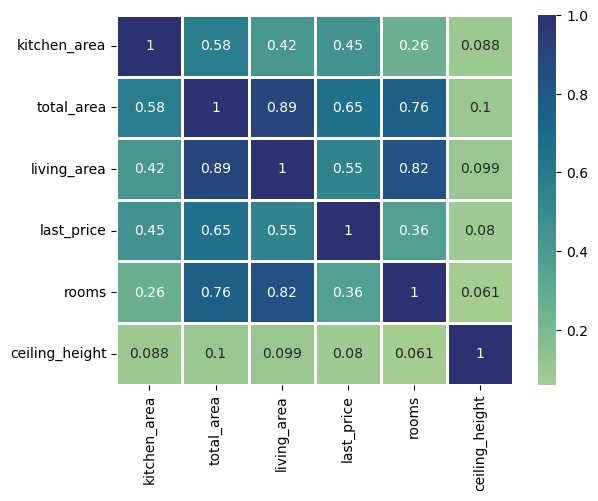

In [224]:
sns.heatmap(hm_data,
           annot = True,
           linewidth=.9,
           cmap='crest')

In [205]:
# разбор
# сделаем переменную для маски с одним массивом из измененного ДФа как выше

# Наны всё портят, их слишком много !!!

In [206]:
drops = droped_estate.values[0]
drops

array([16.0, 'Санкт-Петербург', 18863.0, 16028.0, 1.0, 482.0, 2.0, 755.0,
       2.7], dtype=object)

In [207]:
# сделаем маску по этажам, используя первое значение из переменной, которое = 16

In [208]:
estate['floors_total'] == drops[0]

0         True
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: floors_total, Length: 23699, dtype: bool

In [209]:
# 16ти этажек находится 1376 в базовом массиве

In [210]:
(estate['floors_total'] == drops[0]).sum()

1381

In [211]:
# потом у нас идут названия локаций, они хранятся в drops[1] - Санкт-Петербург
# сделаем маску по ним
# имеем 15721 значений

In [212]:
(estate['locality_name'] == drops[1]).sum()

15721

In [213]:
# ближайшие аэропорты в drops[2] сейчас 18863.0
# имеем 8 записей

In [214]:
(estate['airports_nearest'] == drops[2]).sum()

0

In [215]:
# расстояние до центра города в drops[3] сейчас 16028.0
# имеем 10 записей

In [216]:
(estate['cityCenters_nearest'] == drops[3]).sum()

0

In [217]:
# усложним маску, сделаем ближайшие аэропорты = 18863 и расстояние до центра = 16028
# таких 8 значений

In [218]:
((estate['airports_nearest'] == drops[2]) & (estate['cityCenters_nearest'] == drops[3])).sum()

0